In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
url_data = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

df = pd.read_csv(url_data, compression = 'zip')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23814 entries, 0 to 23813
Columns: 877 entries, id to c-99
dtypes: float64(872), int64(1), object(4)
memory usage: 159.3+ MB


In [4]:
df.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


## RENAME COLUMN

In [5]:
mapa = {'droga': 'composto'}
df.rename(columns=mapa, inplace=True)

#Renomeando colunas com inicial 'g'   0~771 = 0~772
for index in range(772):
    df.rename(columns={f'g-{index}': f'G{index}'}, inplace=True)

#Renomeando colunas com inicial 'c'
for index in range(100):
    df.rename(columns={f'c-{index}': f'C{index}'}, inplace=True)
    
df.head()

,id,tratamento,tempo,dose,composto,G0,G1,G2,G3,G4,...,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


# Aula 1

In [7]:
df.shape

(23814, 877)

In [8]:
df['tratamento'].unique()

array(['com_droga', 'com_controle'], dtype=object)

In [9]:
df['tempo'].unique()

array([24, 72, 48], dtype=int64)

In [10]:
df['dose'].unique()

array(['D1', 'D2'], dtype=object)

In [11]:
df['droga'].unique()

array(['b68db1d53', 'df89a8e5a', '18bb41b2c', ..., '573c787a2',
       'b2fe3eca7', 'dd4a96d16'], dtype=object)

In [12]:
df['g-0'].unique()

array([ 1.062 ,  0.0743,  0.628 , ...,  0.3942,  0.666 , -0.8598])

In [13]:
df['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

In [14]:
df['dose'].value_counts()

D1    12147
D2    11667
Name: dose, dtype: int64

In [15]:
df['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

<AxesSubplot:ylabel='tratamento'>

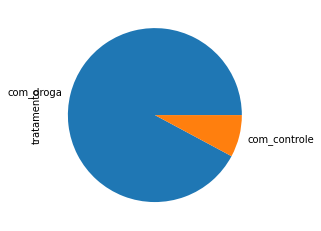

In [16]:
df['tratamento'].value_counts().plot.pie()

<AxesSubplot:ylabel='tempo'>

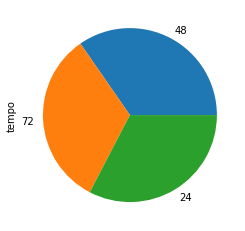

In [17]:
df['tempo'].value_counts().plot.pie()

<AxesSubplot:>

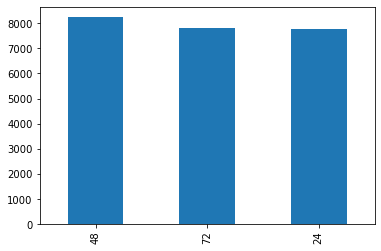

In [18]:
df['tempo'].value_counts().plot.bar()

In [19]:
filtered_df = df[df['g-0'] > 0]
filtered_df.head()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
6,id_001bd861f,com_droga,24,D2,746ca1f5a,2.0440,1.7000,-1.5390,5.9440,-2.1670,...,0.1855,1.1720,0.8325,0.6486,0.8090,1.5880,2.4670,0.0357,0.1351,-0.3179
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260


In [20]:
df

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740


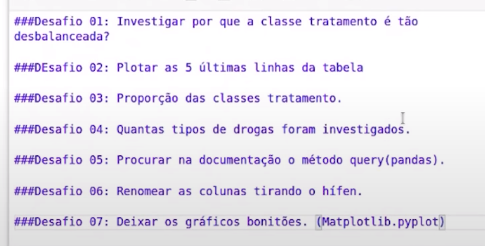

### Desafio 1

In [21]:
df['tratamento'].value_counts()

com_droga       21948
com_controle     1866
Name: tratamento, dtype: int64

### Desafio 2

In [23]:
df.tail()

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,...,0.1969,0.0262,-0.8121,0.3434,0.5372,-0.3246,0.0631,0.9171,0.5258,0.4680
23810,id_fffb70c0c,com_droga,24,D2,ecf3b6b74,-1.3260,0.3478,-0.3743,0.9905,-0.7178,...,0.4286,0.4426,0.0423,-0.3195,-0.8086,-0.9798,-0.2084,-0.1224,-0.2715,0.3689
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808
23812,id_fffcb9e7c,com_droga,24,D1,8b87a7a83,0.6660,0.2324,0.4392,0.2044,0.8531,...,-0.1105,0.4258,-0.2012,0.1506,1.5230,0.7101,0.1732,0.7015,-0.6290,0.0740
23813,id_ffffdd77b,com_droga,72,D1,972f41291,-0.8598,1.0240,-0.1361,0.7952,-0.3611,...,-3.3890,-1.7450,-6.6300,-4.0950,-7.3860,-1.4160,-3.5770,-0.4775,-2.1500,-4.2520


### Desafio 3

In [41]:
df['tratamento'].value_counts(normalize=True)

com_droga       0.921643
com_controle    0.078357
Name: tratamento, dtype: float64

### Desafio 4

In [24]:
all_drogas = df['droga'].unique()
all_drogas.shape

(3289,)

### Desafio 5

In [ ]:
df.query('G0 > 0').head()

### Desafio 6

In [42]:
# df = df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}) inplace muda na tabela real
# df.rename(columns={'G0': 'g-0', 'G1': 'g-1'}, inplace=True)

In [55]:
#Renomeando colunas com inicial 'g'   0~771 = 0~772
for index in range(772):
    df.rename(columns={f'g-{index}': f'G{index}'}, inplace=True)
df.head()

,id,tratamento,tempo,dose,droga,G0,G1,G2,G3,G4,...,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [49]:
#Renomeando colunas com inicial 'c'
for index in range(100):
    df.rename(columns={f'c-{index}': f'C{index}'}, inplace=True)
df.head()

,id,tratamento,tempo,dose,droga,G0,G1,G2,G3,G4,...,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


In [56]:
list(df)

['id',
 'tratamento',
 'tempo',
 'dose',
 'droga',
 'G0',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5',
 'G6',
 'G7',
 'G8',
 'G9',
 'G10',
 'G11',
 'G12',
 'G13',
 'G14',
 'G15',
 'G16',
 'G17',
 'G18',
 'G19',
 'G20',
 'G21',
 'G22',
 'G23',
 'G24',
 'G25',
 'G26',
 'G27',
 'G28',
 'G29',
 'G30',
 'G31',
 'G32',
 'G33',
 'G34',
 'G35',
 'G36',
 'G37',
 'G38',
 'G39',
 'G40',
 'G41',
 'G42',
 'G43',
 'G44',
 'G45',
 'G46',
 'G47',
 'G48',
 'G49',
 'G50',
 'G51',
 'G52',
 'G53',
 'G54',
 'G55',
 'G56',
 'G57',
 'G58',
 'G59',
 'G60',
 'G61',
 'G62',
 'G63',
 'G64',
 'G65',
 'G66',
 'G67',
 'G68',
 'G69',
 'G70',
 'G71',
 'G72',
 'G73',
 'G74',
 'G75',
 'G76',
 'G77',
 'G78',
 'G79',
 'G80',
 'G81',
 'G82',
 'G83',
 'G84',
 'G85',
 'G86',
 'G87',
 'G88',
 'G89',
 'G90',
 'G91',
 'G92',
 'G93',
 'G94',
 'G95',
 'G96',
 'G97',
 'G98',
 'G99',
 'G100',
 'G101',
 'G102',
 'G103',
 'G104',
 'G105',
 'G106',
 'G107',
 'G108',
 'G109',
 'G110',
 'G111',
 'G112',
 'G113',
 'G114',
 'G115',
 'G116',
 'G117

### Desafio 7

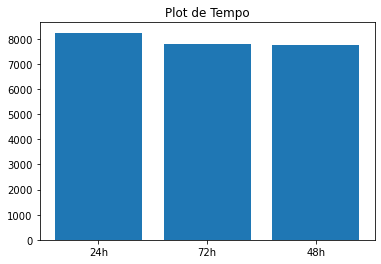

In [34]:
time_caption = list()
for label in df['tempo'].unique():
    time_caption.append(str(label)+'h')

plt.bar(height=df['tempo'].value_counts(), x=time_caption)
plt.title('Plot de Tempo')
plt.show()

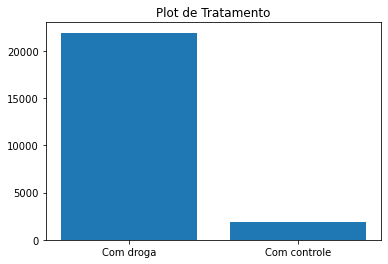

In [35]:
time_caption = ['Com droga', 'Com controle']  

plt.bar(height=df['tratamento'].value_counts(), x=time_caption)
plt.title('Plot de Tratamento')
plt.show()

# Aula 2

## RENAME COLUMN

In [5]:
mapa = {'droga': 'composto'}
df.rename(columns=mapa, inplace=True)

#Renomeando colunas com inicial 'g'   0~771 = 0~772
for index in range(772):
    df.rename(columns={f'g-{index}': f'G{index}'}, inplace=True)

#Renomeando colunas com inicial 'c'
for index in range(100):
    df.rename(columns={f'c-{index}': f'C{index}'}, inplace=True)
    
df.head()

,id,tratamento,tempo,dose,composto,G0,G1,G2,G3,G4,...,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,...,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,...,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,...,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,...,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,...,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125


## SEABORN

In [7]:
df['composto'].value_counts()[0:5]

cacb2b860    1866
87d714366     718
9f80f3f77     246
8b87a7a83     203
5628cb3ee     202
Name: composto, dtype: int64

In [8]:
cod_compostos = df['composto'].value_counts().index[0:5]
cod_compostos

Index(['cacb2b860', '87d714366', '9f80f3f77', '8b87a7a83', '5628cb3ee'], dtype='object')

In [9]:
df.query('composto in @cod_compostos')

,id,tratamento,tempo,dose,composto,G0,G1,G2,G3,G4,...,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99
7,id_0020d0484,com_droga,48,D1,8b87a7a83,0.2711,0.5133,-0.1327,2.5950,0.6980,...,0.3230,-0.4140,0.2532,0.0513,0.8600,1.4250,0.6633,0.4562,-0.9622,0.0260
16,id_002fb9c19,com_droga,48,D1,87d714366,8.7380,0.1914,2.4380,-0.2930,3.2010,...,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-9.9840,-6.7840
25,id_0054388ec,com_controle,48,D1,cacb2b860,-0.6696,-0.2718,-1.2230,-0.6226,-0.7220,...,0.6171,0.6405,0.5429,0.3562,1.3290,0.5573,0.8837,0.5534,0.8976,1.0050
38,id_0079af0fb,com_controle,24,D1,cacb2b860,-0.1636,-1.8230,-0.5211,0.3054,-1.1280,...,-0.3880,-0.6828,-0.6594,-0.2043,0.3571,-0.1319,0.2187,0.0737,0.6498,-1.4820
40,id_007bfbb91,com_controle,24,D2,cacb2b860,-1.3200,-1.7340,-0.0741,1.5440,-1.8290,...,0.7412,1.0340,0.7393,1.1020,0.3786,0.2636,-0.5751,0.3362,0.8543,0.9180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23793,id_ffd26f361,com_controle,48,D2,cacb2b860,0.6008,0.2781,-0.3319,-0.8782,0.9281,...,1.2470,0.9569,-0.2065,-0.4918,0.7863,0.0504,0.8813,0.7757,-0.5272,0.7082
23802,id_fff3976bd,com_droga,24,D1,87d714366,3.2890,2.1270,0.9770,2.0490,2.3170,...,-8.6300,-8.1490,-6.2900,-8.0970,-8.7330,-2.3780,-8.4480,-4.4550,-5.7930,-3.7000
23805,id_fff6df1c5,com_droga,48,D2,5628cb3ee,1.7380,-1.2900,-0.4533,-1.1640,-0.4841,...,0.2865,0.5974,-0.2727,0.1188,1.0770,-1.0250,0.1516,0.4503,-0.6312,-0.8302
23811,id_fffc1c3f4,com_controle,48,D2,cacb2b860,0.3942,0.3756,0.3109,-0.7389,0.5505,...,0.5409,0.3755,0.7343,0.2807,0.4116,0.6422,0.2256,0.7592,0.6656,0.3808


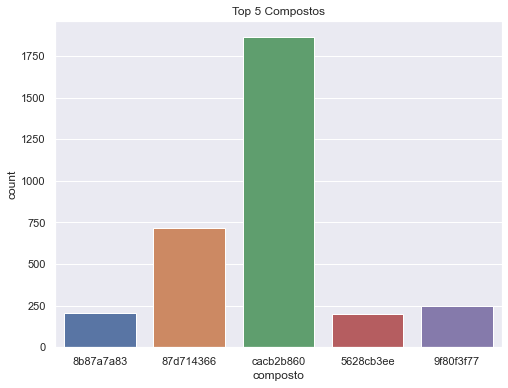

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

# setando o tamanho do grafico 'Seaborn' com 'matplotlib'
plt.figure(figsize=(8, 6))

#sns.countplot(x=COLUMA EIXO, data=DATAFRAME)
ax = sns.countplot(x='composto', data=df.query('composto in @cod_compostos'))
ax.set_title('Top 5 Compostos')
plt.show()

In [11]:
len(df['G0'].unique())

14367

In [12]:
df['G0'].min()

-5.513

In [13]:
df['G0'].max()

10.0

<AxesSubplot:>

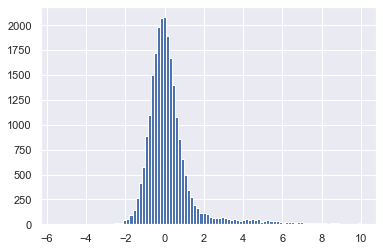

In [14]:
df['G0'].hist(bins=100)

<AxesSubplot:>

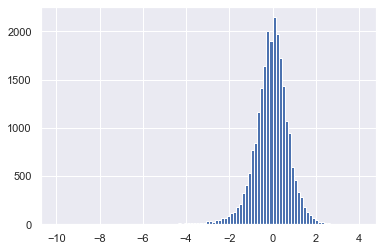

In [15]:
df['G19'].hist(bins=100)

In [16]:
df.describe()

,tempo,G0,G1,G2,G3,G4,G5,G6,G7,G8,...,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [17]:
df[['G0', 'G1']]

,G0,G1
0,1.0620,0.5577
1,0.0743,0.4087
2,0.6280,0.5817
3,-0.5138,-0.2491
4,-0.3254,-0.4009
...,...,...
23809,0.1394,-0.0636
23810,-1.3260,0.3478
23811,0.3942,0.3756
23812,0.6660,0.2324


In [18]:
df.loc[0, 'G0']

1.062

In [19]:
df.loc[:,'G1':'G771'].describe()

,G1,G2,G3,G4,G5,G6,G7,G8,G9,G10,...,G762,G763,G764,G765,G766,G767,G768,G769,G770,G771
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,0.119905,-0.123321,...,0.207299,0.009161,0.171027,0.002316,-0.209799,-0.076251,0.134162,-0.128018,-0.219210,0.101524
std,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,1.087180,1.291501,...,1.096488,1.200395,1.357701,1.052771,1.201918,1.115477,0.951264,1.230636,1.326193,1.417674
min,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,-8.337000,-10.000000,...,-8.193000,-10.000000,-9.795000,-8.180000,-10.000000,-10.000000,-4.269000,-10.000000,-10.000000,-10.000000
25%,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,-0.360200,-0.511475,...,-0.433875,-0.502250,-0.537075,-0.508775,-0.606175,-0.506200,-0.353100,-0.544600,-0.554400,-0.523800
50%,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,0.160450,0.038550,...,0.059600,-0.005900,-0.013600,-0.027700,-0.011850,0.009900,0.005400,0.000600,0.028700,-0.006500
75%,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,0.697775,0.525400,...,0.648500,0.492150,0.522500,0.457000,0.483000,0.511175,0.409075,0.498500,0.496400,0.536950
max,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,6.433000,10.000000,...,10.000000,9.552000,10.000000,8.346000,5.444000,6.317000,10.000000,5.911000,10.000000,10.000000


<AxesSubplot:>

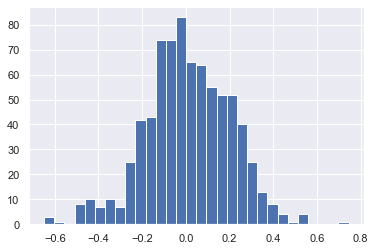

In [20]:
df.loc[:,'G0':'G771'].describe().T['mean'].hist(bins=30)

<AxesSubplot:>

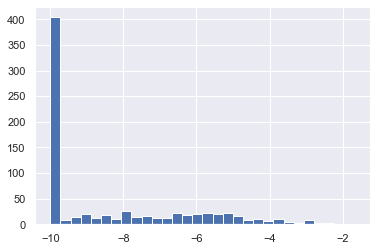

In [21]:
df.loc[:,'G0':'G771'].describe().T['min'].hist(bins=30)

<AxesSubplot:>

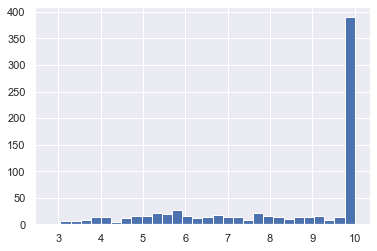

In [22]:
df.loc[:,'G0':'G771'].describe().T['max'].hist(bins=30)

<AxesSubplot:>

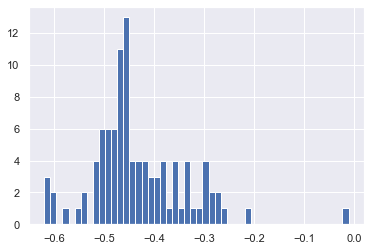

In [23]:
df.loc[:,'C0':'C99'].describe().T['mean'].hist(bins=50)

<AxesSubplot:xlabel='G0'>

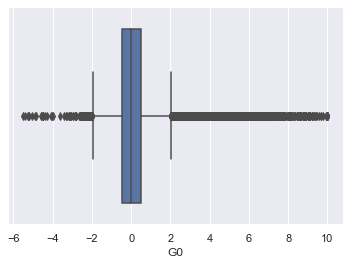

In [24]:
sns.boxplot(x='G0',data=df)

<AxesSubplot:xlabel='G0', ylabel='tratamento'>

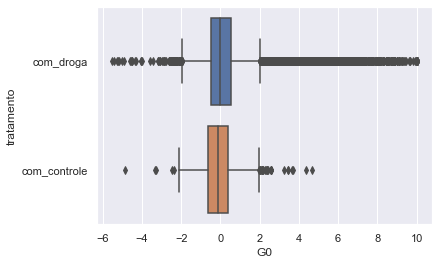

In [25]:
sns.boxplot(x='G0', y='tratamento', data=df)

<AxesSubplot:xlabel='tratamento', ylabel='G0'>

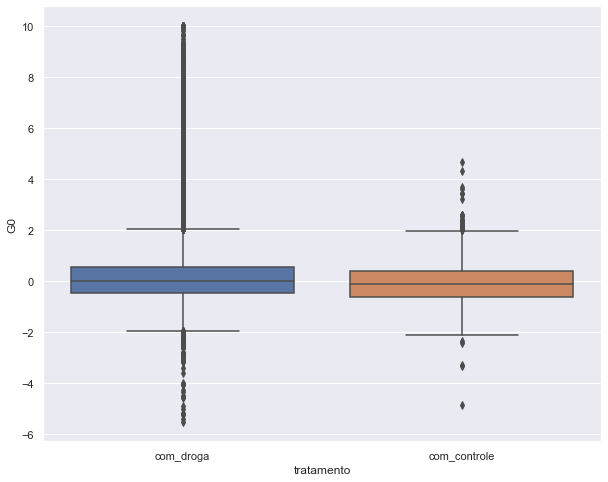

In [26]:
plt.figure(figsize=(10, 8))
sns.boxplot(y='G0', x='tratamento', data=df)

### Desafios Aula 2

### Desafio 01: Ordenar o grafico countplot.
### Desafio 02: Melhorar a visualização alterando tamanho da fonte...
### Desafio 03: Plotar os histogramas com seaborn
### Desafio 04: Estudar sobre as estatisticas retonrnadas no .describe

## Desafio 1

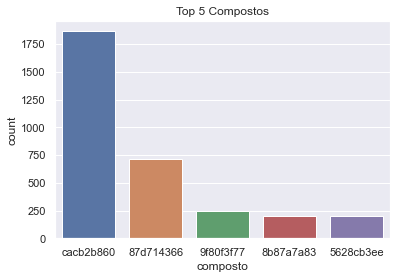

In [27]:
#sns.countplot(x=COLUNA EIXO, data=DATAFRAME)
ax = sns.countplot(x='composto', 
                   data=df.query('composto in @cod_compostos'), 
                   order = cod_compostos)

ax.set_title('Top 5 Compostos')

plt.show()

## Desafio 2

In [1]:
sns.set_context('poster')
plt.figure(figsize=(12, 5))

ax = sns.countplot(x='composto', 
                   data=df.query('composto in @cod_compostos'), 
                   order = cod_compostos, 
                   color='pink')

ax.set_title('Top 5 Compostos')
plt.xlabel('Identificação de Compostos')
plt.ylabel('Quantidade de testes')

plt.show()

NameError: name 'sns' is not defined

## Desafio 3

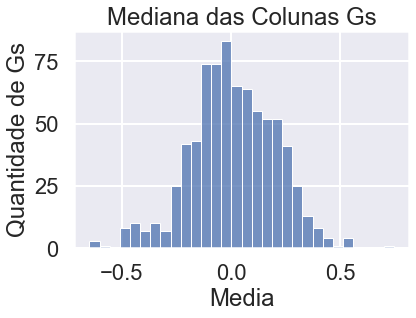

In [70]:
g_mean = df.loc[:,'G0':'G771'].describe().T['mean']
ax = sns.histplot(data=df, x=g_mean, bins=30)

ax.set_title('Mediana das Colunas Gs')
plt.xlabel('Media')
plt.ylabel('Quantidade de Gs')

plt.show()

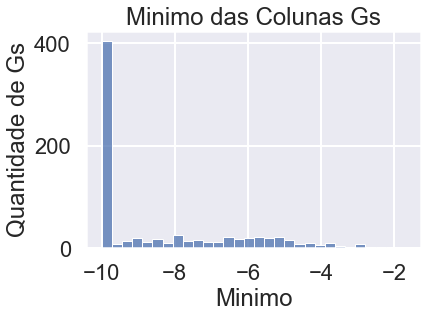

In [66]:
g_min = df.loc[:,'G0':'G771'].describe().T['min']
ax = sns.histplot(data=df, x=g_min, bins=30)

ax.set_title('Minimo das Colunas Gs')
plt.xlabel('Minimo')
plt.ylabel('Quantidade de Gs')

plt.show()

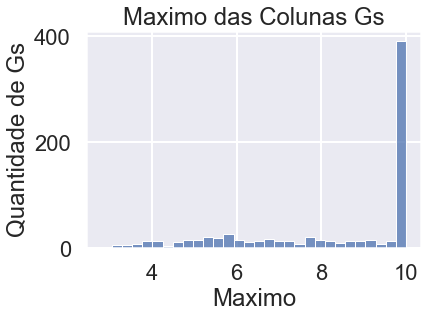

In [67]:
g_max = df.loc[:,'G0':'G771'].describe().T['max']
ax = sns.histplot(data=df, x=g_max, bins=30)

ax.set_title('Maximo das Colunas Gs')
plt.xlabel('Maximo')
plt.ylabel('Quantidade de Gs')

plt.show()

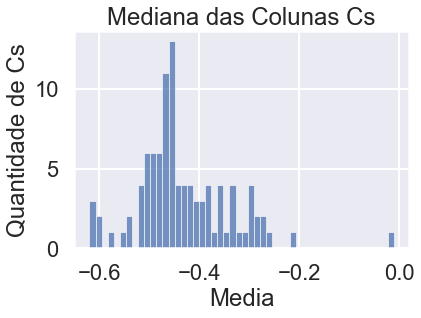

In [71]:
c_mean = df.loc[:,'C0':'C99'].describe().T['mean']
ax = sns.histplot(data=df, x=c_mean, bins=50)

ax.set_title('Mediana das Colunas Cs')
plt.xlabel('Media')
plt.ylabel('Quantidade de Cs')

plt.show()

### Desafio 04

In [ ]:
#Estudar sobre as estatisticas retornadas no .describe

In [69]:
df.describe()

,tempo,G0,G1,G2,G3,G4,G5,G6,G7,G8,...,C90,C91,C92,C93,C94,C95,C96,C97,C98,C99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


In [ ]:
# Count: Quantidade de itens em cada coluna 

In [ ]:
# mean: media = soma de todos os itens e divisão pela quantidade

In [ ]:
# std: Desvio padrão

In [ ]:
# min: menor valor contido na coluna

In [ ]:
# 25%: primeiros 25% dos dados da coluna

In [ ]:
# 50%: primeiros 50% dos dados da coluna e referencia a mediana

In [ ]:
# 75%: primeiros 75% dos dados da coluna

In [ ]:
# max: maior valor contido na coluna

# Aula 3

In [5]:
pd.crosstab(df['dose'], df['tempo'])

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [6]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [7]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], normalize='index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

In [8]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], values=df['G0'], aggfunc='mean')

tratamento  com_controle  com_droga
dose tempo                         
D1   24        -0.251760   0.367996
     48        -0.122773   0.412469
     72        -0.295271   0.286250
D2   24         0.010754   0.115253
     48         0.013174   0.214480
     72         0.070250   0.253439

In [9]:
df[['G0', 'G3']]

,G0,G3
0,1.0620,-0.6208
1,0.0743,0.0604
2,0.6280,-0.0764
3,-0.5138,0.5288
4,-0.3254,0.6919
...,...,...
23809,0.1394,-0.5080
23810,-1.3260,0.9905
23811,0.3942,-0.7389
23812,0.6660,0.2044


<AxesSubplot:xlabel='G0', ylabel='G3'>

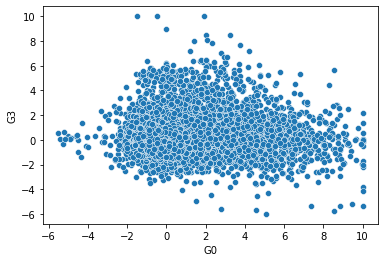

In [10]:
sns.scatterplot(x='G0', y='G3', data=df)

<AxesSubplot:xlabel='G0', ylabel='G8'>

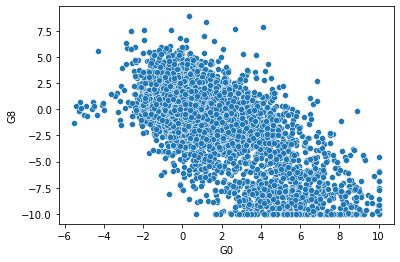

In [11]:
sns.scatterplot(x='G0', y='G8', data=df)

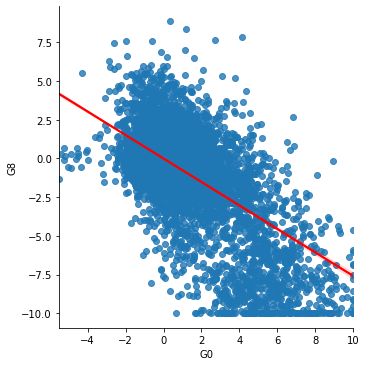

In [12]:
sns.lmplot(data=df, x='G0', y='G8', line_kws={'color':'red'})

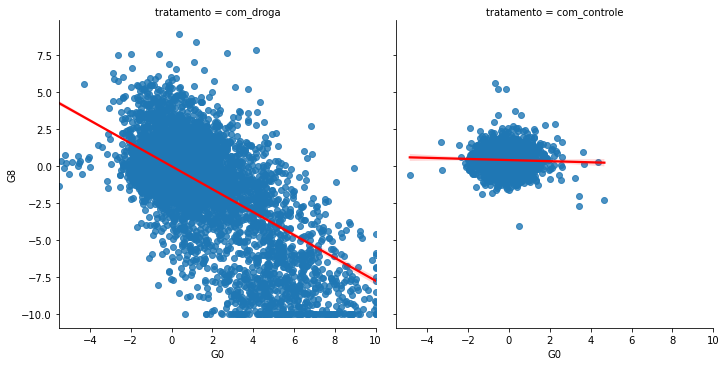

In [13]:
sns.lmplot(data=df, x='G0', y='G8', line_kws={'color':'red'}, col='tratamento')

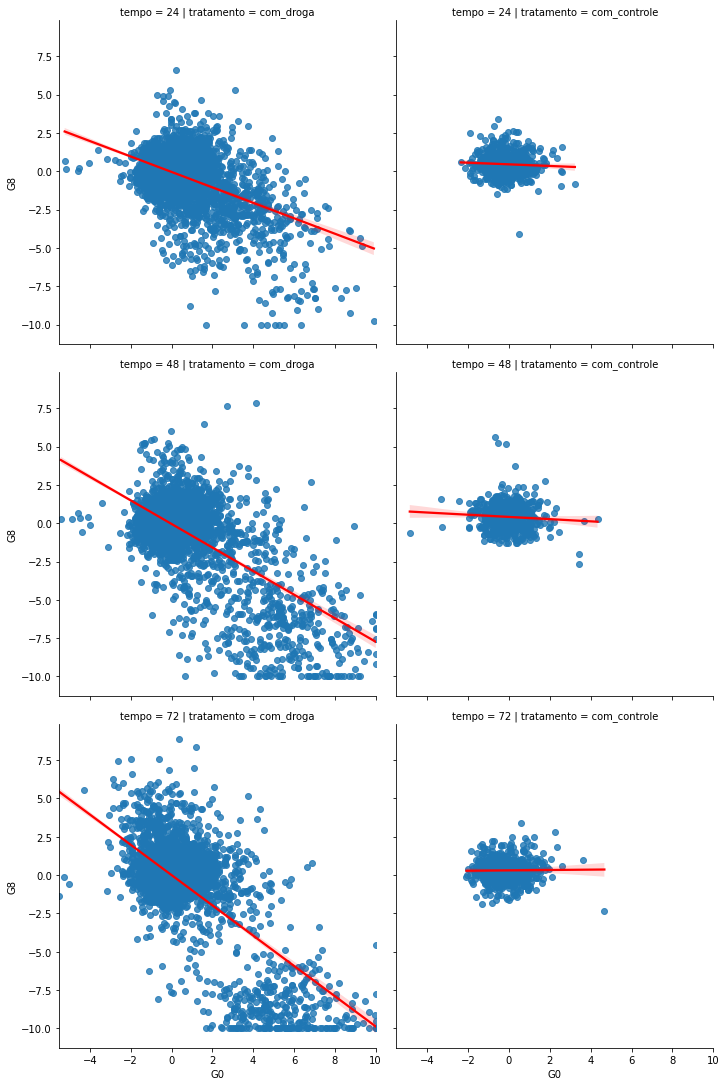

In [14]:
sns.lmplot(data=df, x='G0', y='G8', line_kws={'color':'red'}, col='tratamento', row='tempo')

In [15]:
df.loc[:,'G0':'G771'].corr()

,G0,G1,G2,G3,G4,G5,G6,G7,G8,G9,...,G762,G763,G764,G765,G766,G767,G768,G769,G770,G771
G0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,...,0.005085,-0.239410,0.548401,0.425222,-0.308095,-0.052622,0.300241,-0.127375,-0.514201,0.405908
G1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,...,-0.205998,0.060051,0.115071,0.160140,0.015098,-0.003378,-0.030756,-0.006866,-0.095108,-0.032233
G2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,...,0.090115,-0.055655,0.138085,0.061574,-0.093631,-0.053149,0.115415,0.014489,-0.078661,0.103985
G3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,...,0.075982,0.178422,0.016467,-0.089317,-0.166426,-0.179370,0.028452,-0.206077,-0.002142,0.058219
G4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,...,-0.023752,-0.164868,0.404440,0.317500,-0.225094,0.124425,0.115579,-0.172727,-0.363673,0.250713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
G767,-0.052622,-0.003378,-0.053149,-0.179370,0.124425,-0.081016,-0.000886,0.137336,-0.101191,-0.013157,...,-0.010391,-0.180252,0.003976,-0.027425,0.153722,1.000000,-0.048393,0.065450,0.008603,-0.001136
G768,0.300241,-0.030756,0.115415,0.028452,0.115579,-0.139000,-0.005791,-0.419437,-0.209968,-0.291836,...,0.077292,0.000048,0.403211,0.241509,-0.250512,-0.048393,1.000000,0.079364,-0.382607,0.351651
G769,-0.127375,-0.006866,0.014489,-0.206077,-0.172727,-0.068537,-0.278587,-0.082554,0.268571,0.037013,...,0.020662,0.071082,0.013235,0.021152,0.151940,0.065450,0.079364,1.000000,0.135853,-0.083713
G770,-0.514201,-0.095108,-0.078661,-0.002142,-0.363673,0.144631,-0.143428,0.402451,0.441011,0.415967,...,0.014331,-0.010849,-0.498222,-0.489116,0.284882,0.008603,-0.382607,0.135853,1.000000,-0.425063


In [16]:
corr = df.loc[:,'G0':'G50'].corr()

<AxesSubplot:>

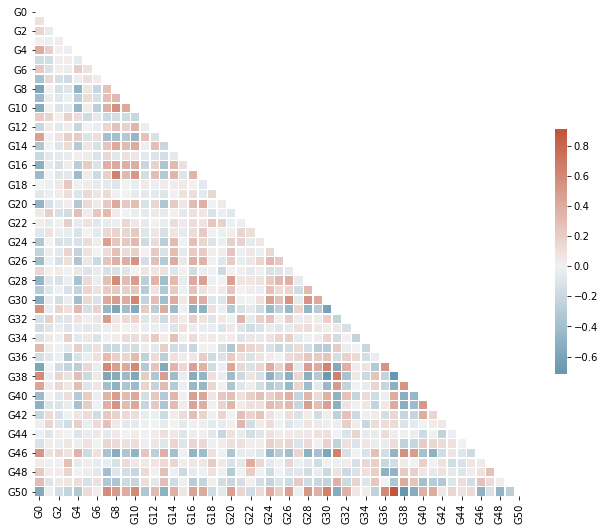

In [17]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
corr_celular = df.loc[:,'C0':'C50'].corr()

<AxesSubplot:>

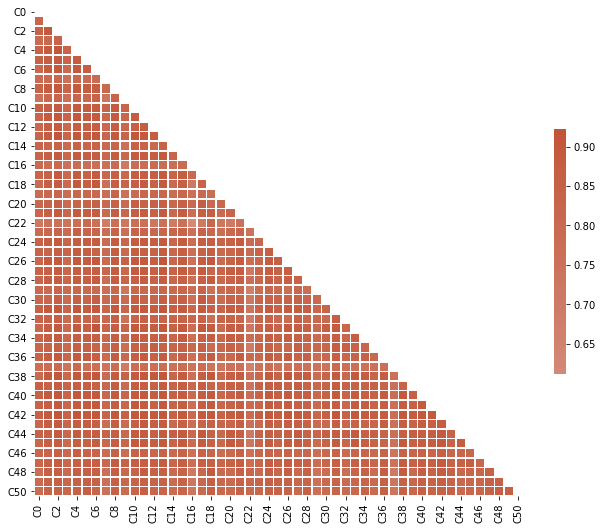

In [19]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Desafios

### Desafio 1: Criar tabelas de frequencia com pandas.groupby()
### Desafio 2: Normalizar o crosstab pela coluna
### Desafio 3: Explorar outros agregadores
### Desafio 4: Explorar o melt.
### Desafio 5: Calcular e analisar a correlação entre G e C
### Refletir sobre os efeitos biologicos nessa correlação.
### Desafio 6: Estudar o codigo quem plota a matriz de correlação (heatmap)


### Desafio 01

In [20]:
df.groupby(['dose', 'tempo'])['G0'].mean()

dose  tempo
D1    24       0.319991
      48       0.370304
      72       0.240556
D2    24       0.107051
      48       0.198721
      72       0.239057
Name: G0, dtype: float64

In [21]:
df.groupby(['dose', 'tempo'])['G0'].max()

dose  tempo
D1    24        9.908
      48       10.000
      72        9.355
D2    24        7.167
      48       10.000
      72       10.000
Name: G0, dtype: float64

In [22]:
df.groupby(['dose', 'tempo'])['G0'].min()

dose  tempo
D1    24      -5.183
      48      -5.420
      72      -5.261
D2    24      -5.233
      48      -4.859
      72      -5.513
Name: G0, dtype: float64

In [23]:
df.groupby(['dose', 'tempo', 'tratamento'])['G0'].mean()

dose  tempo  tratamento  
D1    24     com_controle   -0.251760
             com_droga       0.367996
      48     com_controle   -0.122773
             com_droga       0.412469
      72     com_controle   -0.295271
             com_droga       0.286250
D2    24     com_controle    0.010754
             com_droga       0.115253
      48     com_controle    0.013174
             com_droga       0.214480
      72     com_controle    0.070250
             com_droga       0.253439
Name: G0, dtype: float64

In [24]:
df.groupby(['dose', 'tempo', 'tratamento'])['G0'].max()

dose  tempo  tratamento  
D1    24     com_controle     3.226
             com_droga        9.908
      48     com_controle     3.423
             com_droga       10.000
      72     com_controle     2.584
             com_droga        9.355
D2    24     com_controle     2.601
             com_droga        7.167
      48     com_controle     4.335
             com_droga       10.000
      72     com_controle     4.670
             com_droga       10.000
Name: G0, dtype: float64

In [25]:
df.groupby(['dose', 'tempo', 'tratamento'])['G0'].min()

dose  tempo  tratamento  
D1    24     com_controle   -2.370
             com_droga      -5.183
      48     com_controle   -3.276
             com_droga      -5.420
      72     com_controle   -2.086
             com_droga      -5.261
D2    24     com_controle   -2.135
             com_droga      -5.233
      48     com_controle   -4.859
             com_droga      -4.567
      72     com_controle   -1.909
             com_droga      -5.513
Name: G0, dtype: float64

### Desafio 2

In [26]:
# df.groupby(['dose', 'tempo', 'tratamento'])['G0'].transform('sum').rename('norm_G0')

In [27]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], normalize='columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

### Desafio 3

In [28]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], values=df['G0'], aggfunc='max')

tratamento  com_controle  com_droga
dose tempo                         
D1   24            3.226      9.908
     48            3.423     10.000
     72            2.584      9.355
D2   24            2.601      7.167
     48            4.335     10.000
     72            4.670     10.000

In [29]:
pd.crosstab([df['dose'], df['tempo']], df['tratamento'], values=df['G0'], aggfunc='min')

tratamento  com_controle  com_droga
dose tempo                         
D1   24           -2.370     -5.183
     48           -3.276     -5.420
     72           -2.086     -5.261
D2   24           -2.135     -5.233
     48           -4.859     -4.567
     72           -1.909     -5.513

### Desafio 4

In [30]:
# explorar o melt

In [31]:
df_melt = pd.melt(df, id_vars = ['dose'], value_vars=['tratamento'])
df_melt.head(5)

,dose,variable,value
0,D1,tratamento,com_droga
1,D1,tratamento,com_droga
2,D1,tratamento,com_droga
3,D1,tratamento,com_droga
4,D2,tratamento,com_droga


In [32]:
df_melt2 = pd.melt(df, id_vars = ['dose', 'tempo', 'tratamento'], value_vars=['G0'])
df_melt2.head(6)

,dose,tempo,tratamento,variable,value
0,D1,24,com_droga,G0,1.0620
1,D1,72,com_droga,G0,0.0743
2,D1,48,com_droga,G0,0.6280
3,D1,48,com_droga,G0,-0.5138
4,D2,72,com_droga,G0,-0.3254
5,D1,24,com_droga,G0,-0.6111


### Desafio 5

In [35]:
### Desafio 5: Calcular e analisar a correlação entre G e C
df_G = df.loc[:, 'G0':'G50']
df_C = df.loc[:, 'C0':'C50']

df_G.corr(df_C)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

# Aula 4

In [6]:
dados_resultados = pd.read_csv('https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_resultados.csv?raw=true')
dados_resultados.head()

,id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dados_resultados['acetylcholine_receptor_agonist'].unique()

array([0, 1], dtype=int64)

In [10]:
contagem_moa = dados_resultados.select_dtypes('int64').sum().sort_values(ascending=False)
contagem_moa

nfkb_inhibitor                                832
proteasome_inhibitor                          726
cyclooxygenase_inhibitor                      435
dopamine_receptor_antagonist                  424
serotonin_receptor_antagonist                 404
                                             ... 
protein_phosphatase_inhibitor                   6
autotaxin_inhibitor                             6
diuretic                                        6
erbb2_inhibitor                                 1
atp-sensitive_potassium_channel_antagonist      1
Length: 206, dtype: int64

## Desafios

### 01: Encontrar o top 10, das açoes do MOA (inibidor, agonista...)